In [1]:
import numpy as np
import pandas as pd

---
# Import data

In [75]:
dataset = pd.read_csv('SP-280-Leste.csv', sep=',',header=None)
dataset.head()

,0,1,2,3
0,1,01/09/2011 00:00,37,89.0
1,2,01/09/2011 00:05,48,82.0
2,3,01/09/2011 00:10,26,85.0
3,4,01/09/2011 00:15,47,81.0
4,5,01/09/2011 00:20,52,82.0


## Clean and organize dataset

+ ### Organize the dataset

    Organize the columns, remove some not useful data, rename the columns and convert each column to your correct unit.

+ ### Date-time columns

    Working with date-time date requires to change the index DataFrame to the column that contain Date-Time values


In [76]:
'''Organize'''
# Drop the column '0'
dataset = dataset.drop(columns=0)

# Rename columns
dataset = dataset.rename(columns={0:"ID", 1:"Date-Time",2:"Flow[veh/h.lane]", 3:"Speed[km/h]" })

# Calculate the Flow rate
dataset["Flow[veh/h.lane]"] = dataset["Flow[veh/h.lane]"] * 60 / 5 / 2 # two lanes

# Calculate the Density
dataset["Density[veh/km.lane]"] = dataset["Flow[veh/h.lane]"] / dataset['Speed[km/h]']

# Convert to Datetime
dataset['Date-Time'] = pd.to_datetime(dataset['Date-Time'], format='%d/%m/%Y %H:%M')

'''Date-time column index'''
dataset.set_index('Date-Time',inplace=True)
dataset.head()

,Flow[veh/h.lane],Speed[km/h],Density[veh/km.lane]
Date-Time,,,
2011-09-01 00:00:00,222.0,89.0,2.494382
2011-09-01 00:05:00,288.0,82.0,3.512195
2011-09-01 00:10:00,156.0,85.0,1.835294
2011-09-01 00:15:00,282.0,81.0,3.481481
2011-09-01 00:20:00,312.0,82.0,3.804878


+ ### Missing values

    Verifying some missing values in dataset


In [77]:
dataset.isna().sum()

Flow[veh/h.lane]         0
Speed[km/h]              1
Density[veh/km.lane]    39
dtype: int64

In [78]:
dataset = dataset.fillna(0.0)
dataset.isna().sum()

Flow[veh/h.lane]        0
Speed[km/h]             0
Density[veh/km.lane]    0
dtype: int64

---
# Wavelet Analysis

## Applying Wavelet functions
+ using Haar Wavelet for each traffic variable

In [1]:
import pywt

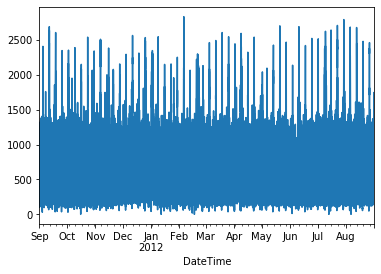

In [6]:
dataVar = 'Flow[veh/h.lane]'
dataset[dataVar].plot()

### 1. Continuous Wavelet Transform (CWT)

In [4]:
import scaleogram as scg

pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

In [8]:
data = np.array(dataset[dataVar])

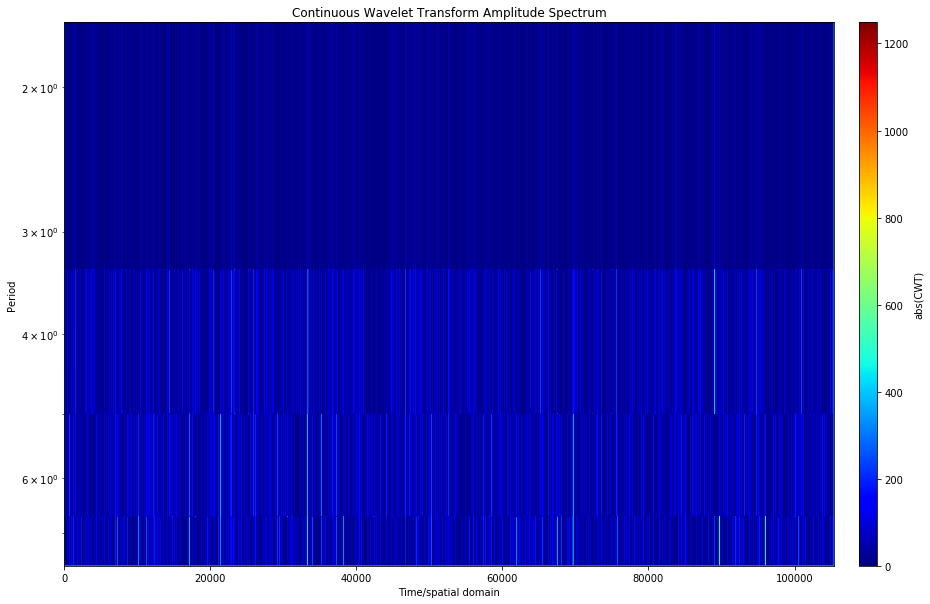

In [9]:
scg.cws(data, scales=np.arange(1,5), wavelet='gaus8', figsize=(15,10), yscale='log')

### 2. Discrete Wavelet Transform (DWT)

In [21]:
wp = pywt.WaveletPacket(data, 'haar', maxlevel=4)
wp.data

array([222., 288., 156., ..., 318., 360., 336.])

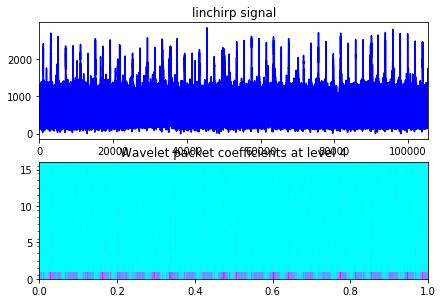

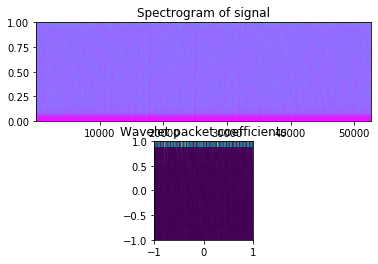

In [18]:
x = np.arange(len(data))
wavelet = 'haar'
level = 4  #pywt.dwt_max_level(len(data), wavelet) 
order = "freq"  # other option is "normal"
interpolation = 'nearest'
cmap = plt.cm.cool

# Construct wavelet packet
wp = pywt.WaveletPacket(data, wavelet, 'symmetric', maxlevel=level)
nodes = wp.get_level(level, order=order)
labels = [n.path for n in nodes]
values = np.array([n.data for n in nodes], 'd')
values = abs(values)

# Show signal and wavelet packet coefficients
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, bottom=.03, left=.07, right=.97, top=.92)
ax = fig.add_subplot(2, 1, 1)
ax.set_title("Signal")
ax.plot(x, data, 'b')
ax.set_xlim(0, x[-1])

ax = fig.add_subplot(2, 1, 2)
ax.set_title("Wavelet packet coefficients at level %d" % level)
ax.imshow(values, interpolation=interpolation, cmap=cmap, aspect="auto",
          origin="lower", extent=[0, 1, 0, len(values)])
ax.set_yticks(np.arange(0.5, len(labels) + 0.5), labels)

# Show spectrogram and wavelet packet coefficients
fig2 = plt.figure()
ax2 = fig2.add_subplot(211)
ax2.specgram(data, NFFT=64, noverlap=32, Fs=2, cmap=cmap,
             interpolation='bilinear')
ax2.set_title("Spectrogram of signal")
ax3 = fig2.add_subplot(212)
ax3.imshow(values, origin='upper', extent=[-1, 1, -1, 1],
           interpolation='nearest')
ax3.set_title("Wavelet packet coefficients")


plt.show()